# **Cortus Malware Analyzer**
This section of the notebook contains the data importing and cleaning of the features extracted from memory.

For the purpose of runtime, not all GUI displays are enabled, if you wish to see them uncomment the provided lines.

**Import libraries needed for model**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import seaborn as sns


np.set_printoptions(threshold=sys.maxsize)

In [16]:
finalFrame = pd.read_pickle("C:\\Users\\jshke\\Desktop\\dbchange\\datasetFinalPKL.pkl")
finalFrame = finalFrame.dropna(axis=1, how='all')
finalFrame = finalFrame.fillna(0)

In [17]:
finalFrame

,processName,processType,arch,binsz,bits,canary,retguard,class,compiled,compiler,...,C:\Windows\SysWOW64\api-ms-win-downlevel-advapi32-l2-1-0.dll_size,C:\Windows\SysWOW64\wscript.exe_perms,C:\Windows\SysWOW64\secur32.dll_perms,C:\Windows\SysWOW64\api-ms-win-downlevel-advapi32-l2-1-0.dll_perms,C:\Windows\System32\vbscript.dll_size,C:\Windows\System32\vbscript.dll_perms,C:\Users\admin\AppData\Local\Temp\ynfbyf.exe_size,C:\Windows\System32\rtm.dll_size,C:\Users\admin\AppData\Local\Temp\ynfbyf.exe_perms,C:\Windows\System32\rtm.dll_perms
0,0003192f0b40006cf3e6a15102d9065a70918c46feaba8...,malicious,x86,51534215,32,False,False,,,,...,0.0,0,0,0,0.0,0,0.0,0.0,0,0
1,00429C2AEEC25C0FCFD21C54B05D800B16CD0FE3574C41...,malicious,x86,40859158,32,False,False,,,,...,0.0,0,0,0,0.0,0,0.0,0.0,0,0
2,00b4e13fd8eaae74e4244919a2301ee56599a6f3b4863a...,malicious,x86,48701673,32,False,False,,,,...,0.0,0,0,0,0.0,0,0.0,0.0,0,0
3,012b1b20e71c517b3b59782ded850b21eb59707e702eb3...,malicious,x86,48300637,32,False,False,,,,...,0.0,0,0,0,0.0,0,0.0,0.0,0,0
4,01828be39e9c87bcfe2f59374c1dc5e9fb963bffcf3bf5...,malicious,x86,125974158,32,False,False,,,,...,0.0,0,0,0,0.0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,wscript.exe_220221_014704.dmp_malicious,malicious,x86,85181688,32,False,False,,,,...,16384.0,----,----,----,0.0,0,0.0,0.0,0,0
595,wscript.exe_220221_025452.dmp_malicious,malicious,x86,52342676,32,False,False,,,,...,16384.0,----,----,----,0.0,0,0.0,0.0,0,0
596,wscript.exe_220309_013444.dmp_malicious,malicious,x86,29612378,64,False,False,,,,...,0.0,0,0,0,593920.0,----,0.0,0.0,0,0
597,wscript.exe_220309_013700.dmp_malicious,malicious,x86,29612274,64,False,False,,,,...,0.0,0,0,0,593920.0,----,0.0,0.0,0,0


**Data Cleaning and Analysis**
1.   Data filtering
2.   Data transformation
3.   Feature visualisation and Analysis
4.   Final data creation

In [18]:
def dataPreProcessing(dataset) :
    dataset = dataset.dropna(axis=1, how='all')
    dataset = dataset.fillna(0)

    # Find counts of level of permissions
    dataset[dataset.filter(regex='_perms').columns] = dataset[dataset.filter(regex='_perms').columns].apply(lambda col:(pd.Categorical(col).codes))
    dataset = pd.concat([dataset, pd.DataFrame(dataset[dataset.filter(regex='_perms').columns].stack().groupby(level=0).value_counts().unstack(fill_value=0).add_prefix("permissionCount_"))], axis=1)
    dataset = dataset.drop(dataset.filter(regex='_perms').columns, axis=1)

    # Grab count of interesting memory sections per process dump
    dataset = dataset.drop(dataset.filter(regex='Memory_Section').columns, axis=1)
    dataUniqueMemorySectionCount = dataset[dataset.filter(regex='_size').columns].gt(0).sum(axis=1)
    dataset['uniqueMemorySectionCount'] = dataUniqueMemorySectionCount
    dataset = dataset.drop(dataset.filter(regex='_size').columns, axis=1)

    # Clean up string data into categorical data
    dataset['arch']     = pd.Categorical(dataset['arch']).codes
    dataset['bits']     = pd.Categorical(dataset['bits']).codes
    dataset['canary']   = pd.Categorical(dataset['canary']).codes
    dataset['retguard'] = pd.Categorical(dataset['retguard']).codes
    dataset['crypto']   = pd.Categorical(dataset['crypto']).codes
    dataset['endian']   = pd.Categorical(dataset['endian']).codes
    dataset['flags']    = pd.Categorical(dataset['flags']).codes
    dataset['havecode'] = pd.Categorical(dataset['havecode']).codes
    dataset['machine']  = pd.Categorical(dataset['machine']).codes
    dataset['static']   = pd.Categorical(dataset['static']).codes
    dataset = dataset.drop(['class', 'compiled', 'compiler', 'dbg_file', 'hdr.csum', 'guid', 'intrp', 'lang', 'cc', 'rip'], 1)
    
    # dataset = dataset.iloc[: , 1:]
    dataset = dataset.loc[:, ~dataset.eq(0).all()]

    return dataset

In [19]:
finalFrame = dataPreProcessing(finalFrame)
finalFrame

C:\Users\jshke\AppData\Local\Temp\ipykernel_25596\3990781429.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop(['class', 'compiled', 'compiler', 'dbg_file', 'hdr.csum', 'guid', 'intrp', 'lang', 'cc', 'rip'], 1)


,processName,processType,binsz,bits,machine,os,rpath,static,streams,subsys,...,importNameContentFull,importCount,slackByteCount,permissionCount_0,permissionCount_1,permissionCount_2,permissionCount_3,permissionCount_4,permissionCount_5,uniqueMemorySectionCount
0,0003192f0b40006cf3e6a15102d9065a70918c46feaba8...,malicious,51534215,0,1,Windows NT Workstation 6.1.7601,NONE,0,13,,...,"[RtlUnwind, RtlCaptureContext, RtlCaptureStack...",8751,528472,2723,162,83,126,185,0,136
1,00429C2AEEC25C0FCFD21C54B05D800B16CD0FE3574C41...,malicious,40859158,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[RtlUnwind, RtlCaptureContext, RtlCaptureStack...",9374,533035,2770,249,99,97,64,0,214
2,00b4e13fd8eaae74e4244919a2301ee56599a6f3b4863a...,malicious,48701673,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[GetCurrentProcess, CreateProcessW, ExitThread...",11680,675112,2541,341,156,148,93,0,318
3,012b1b20e71c517b3b59782ded850b21eb59707e702eb3...,malicious,48300637,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[GetCurrentProcess, CreateProcessW, ExitThread...",11680,674985,2560,344,153,137,85,0,318
4,01828be39e9c87bcfe2f59374c1dc5e9fb963bffcf3bf5...,malicious,125974158,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[_CorExeMain, EnterCriticalSection, LeaveCriti...",10665,1121188,2431,360,155,152,165,16,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,wscript.exe_220221_014704.dmp_malicious,malicious,85181688,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[RegCreateKeyA, RegCloseKey, RegSetValueA, Reg...",15853,1144324,2594,331,142,125,87,0,288
595,wscript.exe_220221_025452.dmp_malicious,malicious,52342676,0,1,Windows NT Workstation 6.1.7601,NONE,0,14,,...,"[RegCreateKeyA, RegCloseKey, RegSetValueA, Reg...",11086,594370,2757,238,109,110,65,0,211
596,wscript.exe_220309_013444.dmp_malicious,malicious,29612378,1,0,Windows NT Workstation 6.1.7601,NONE,0,13,,...,"[RegSetValueA, RegDeleteKeyA, RegCreateKeyA, R...",7379,504854,2803,221,83,70,69,33,199
597,wscript.exe_220309_013700.dmp_malicious,malicious,29612274,1,0,Windows NT Workstation 6.1.7601,NONE,0,13,,...,"[RegSetValueA, RegDeleteKeyA, RegCreateKeyA, R...",7379,504854,2803,222,81,72,68,33,199


In [20]:
def categoricalAnalysisOccurance(processType, processName, series, seriesName) :
    dataframe = pd.DataFrame(series.tolist())
    dataframe['ProcessType'] = processType
    dataframe['ProcessName'] = processName

    dataframe = dataframe.set_index(['ProcessType', 'ProcessName'])
    dataframe = dataframe.stack().dropna()
    dataframe.name = seriesName

    groupedFrame = dataframe.groupby(['ProcessType']).value_counts().groupby(level=0).nlargest(10)
    return groupedFrame

def categoricalAnalysisLen(processType, processName, series, seriesName) :
    dataframe = pd.DataFrame(series.tolist())
    dataframe['ProcessType'] = processType
    dataframe['ProcessName'] = processName

    dataframe = dataframe.set_index(['ProcessType', 'ProcessName'])
    dataframe = dataframe.stack().dropna()
    dataframe.name = seriesName

    groupedFrame = dataframe.groupby(['ProcessType', 'ProcessName'])
    return groupedFrame

ProcessType
benign       110470.0
malicious     56006.0
Name: Process Strings, dtype: float64
ProcessType
benign       137012.0
malicious     36373.0
Name: Process Strings, dtype: float64
ProcessType  ProcessType  Process Strings
benign       benign       \bp\a`             360888
                          Name               351136
                          Data               346673
                          \fp\v`             221438
                          0E\fw              151392
                          `O\fw              150632
                          z_GY               115514
                          0ECw               111552
                          `OCw               110992
                          \tEventData         87725
malicious    malicious    Name               245970
                          Data               243092
                          z_GY                65268
                          \tEventData         57362
                          TEMP            

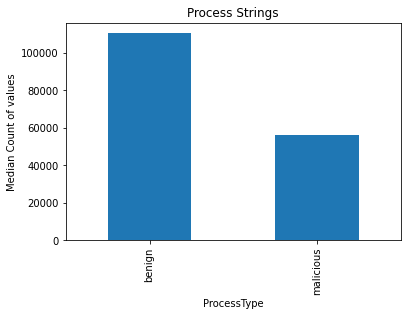

ProcessType
benign       92.0
malicious    57.0
Name: Section Names, dtype: float64
ProcessType
benign       134.0
malicious     29.0
Name: Section Names, dtype: float64
ProcessType  ProcessType  Section Names     
benign       benign       Memory_Section_276    1040905
                          Memory_Section_231     957661
                          Memory_Section_570     951968
                          Memory_Section_22      627424
                          Memory_Section_128     601879
                          Memory_Section_17      537738
                          Memory_Section_137     489668
                          Memory_Section_245     444607
                          Memory_Section_279     419223
                          Memory_Section_34      416353
malicious    malicious    Memory_Section_179     603747
                          Memory_Section_248     408531
                          Memory_Section_222     220856
                          Memory_Section_171     174276
 

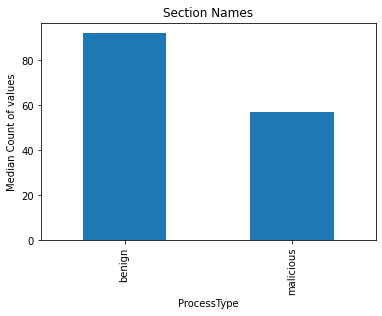

ProcessType
benign       474.0
malicious    414.0
Name: Section Sizes, dtype: float64
ProcessType
benign       751.0
malicious    193.0
Name: Section Sizes, dtype: float64
ProcessType  ProcessType  Section Sizes                            
benign       benign       .rsrc_1_369152                               323
                          .rsrc_3_1536                                 323
                          Memory_Section_65536                         323
                          RT_512                                       323
                          Shared_171520                                323
                          .data_1_26112                                264
                          .data_2_5632                                 264
                          .data_3_6656                                 264
                          .pdata_1_57344                               264
                          .pdata_2_38400                               264
malicious 

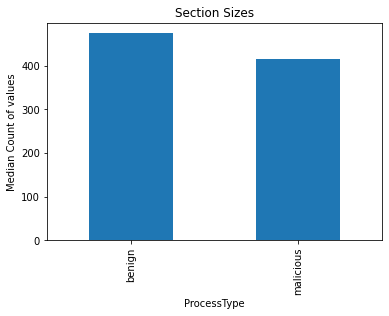

ProcessType
benign       474.0
malicious    414.0
Name: Section Permissions, dtype: float64
ProcessType
benign       751.0
malicious    193.0
Name: Section Permissions, dtype: float64
ProcessType  ProcessType  Section Permissions
benign       benign       .data_-rw-             323
                          .data_10_-rw-          323
                          .data_11_-rw-          323
                          .data_12_-rw-          323
                          .data_13_-rw-          323
                          .data_1_-rw-           323
                          .data_2_-rw-           323
                          .data_3_-rw-           323
                          .data_4_-rw-           323
                          .data_5_-rw-           323
malicious    malicious    .data_1_-rw-           276
                          .data_2_-rw-           276
                          .data_3_-rw-           276
                          .reloc_1_-r--          276
                          .r

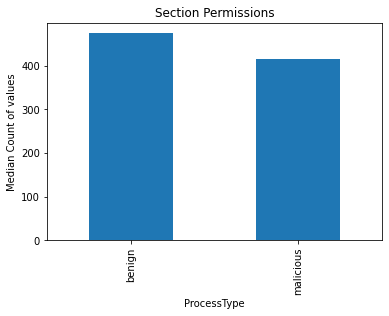

ProcessType
benign       10600.0
malicious     5800.0
Name: Relocations, dtype: float64
ProcessType
benign       11756.0
malicious     3560.0
Name: Relocations, dtype: float64
ProcessType  ProcessType  Relocations                
benign       benign       GetCurrentProcess              15890
                          GetCurrentProcessId            15835
                          GetCurrentThreadId             15835
                          GetSystemTimeAsFileTime        15586
                          QueryPerformanceCounter        15567
                          TerminateProcess               15567
                          GetLastError                   15255
                          SetUnhandledExceptionFilter    15244
                          UnhandledExceptionFilter       15244
                          GetTickCount                   15175
malicious    malicious    GetCurrentThreadId              5543
                          GetCurrentProcessId             5529
              

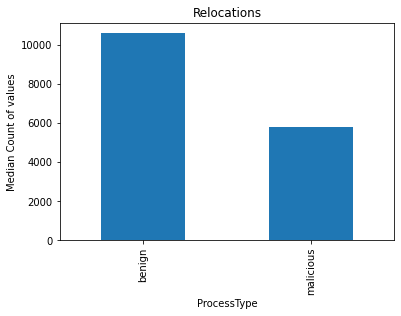

ProcessType
benign       10600.0
malicious     5800.0
Name: Import Names, dtype: float64
ProcessType
benign       11756.0
malicious     3560.0
Name: Import Names, dtype: float64
ProcessType  ProcessType  Import Names               
benign       benign       GetCurrentProcess              15890
                          GetCurrentProcessId            15835
                          GetCurrentThreadId             15835
                          GetSystemTimeAsFileTime        15586
                          QueryPerformanceCounter        15567
                          TerminateProcess               15567
                          GetLastError                   15255
                          SetUnhandledExceptionFilter    15244
                          UnhandledExceptionFilter       15244
                          GetTickCount                   15175
malicious    malicious    GetCurrentThreadId              5543
                          GetCurrentProcessId             5529
            

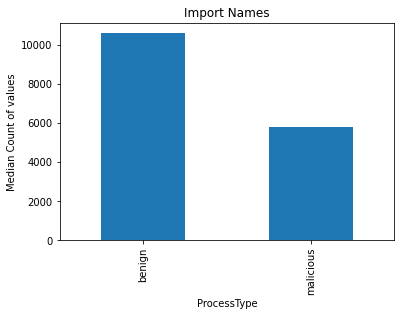

ProcessType
benign       10600.0
malicious     5800.0
Name: Import Libraries, dtype: float64
ProcessType
benign       11756.0
malicious     3560.0
Name: Import Libraries, dtype: float64
ProcessType  ProcessType  Import Libraries                         
benign       benign       KERNEL32.dll                                 876313
                          ntdll.dll                                    649312
                          USER32.dll                                   466474
                          msvcrt.dll                                   325858
                          GDI32.dll                                    215435
                          DUI70.dll                                    165375
                          SHLWAPI.dll                                  136699
                          ADVAPI32.dll                                 117684
                          RPCRT4.dll                                   115330
                          ole32.dll         

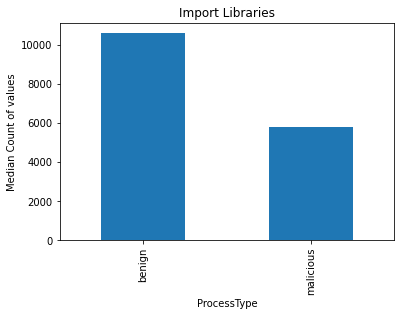

In [21]:
hashColumnLists = [ ('stringContentFull', 'Process Strings'), ('sectionContentFull', 'Section Names'), ('sectionSizeFull', 'Section Sizes'), ('sectionPermsFull', 'Section Permissions'), ('relocationContentFull', 'Relocations'), ('importNameContentFull', 'Import Names'), ('importLibContentFull', 'Import Libraries')]

for seriesFeature in hashColumnLists:
    groupedFrame = categoricalAnalysisLen(finalFrame['processType'], finalFrame['processName'], finalFrame[seriesFeature[0]], seriesFeature[1])

    if (seriesFeature[0] == 'sectionContentFull') :
        print(groupedFrame.nunique().groupby(level=0).median().round())
        print(groupedFrame.nunique().groupby(level=0).std().round())
        groupedFrame.nunique().groupby(level=0).median().round().plot.bar(ylabel="Median Count of values", title=seriesFeature[1])
    else :
        print(groupedFrame.count().groupby(level=0).median().round())
        print(groupedFrame.count().groupby(level=0).std().round())
        groupedFrame.count().groupby(level=0).median().round().plot.bar(ylabel="Median Count of values", title=seriesFeature[1])

    print(categoricalAnalysisOccurance(finalFrame['processType'], finalFrame['processName'], finalFrame[seriesFeature[0]], seriesFeature[1]))

    plt.show()
